In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


Using device=mps
middle-C=261.63 Hz
Using sample rate=44100 Hz, FFT=2048 buckets, hop=1536 samples, duration=2.0 sec = 57 time steps
Max frequency=11025 Hz --> freq_buckets=1024


/Users/Richard/Coding/SampleGen/AudioUtils.py:72: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sr, data = wavfile.read(file_name)


stft = numpy.ndarray(1025, 125) x complex64, size=128,125 elements = 1,025,000 bytes
truncated = numpy.ndarray(1025, 57) x complex64, size=58,425 elements = 467,400 bytes
original max=74.96


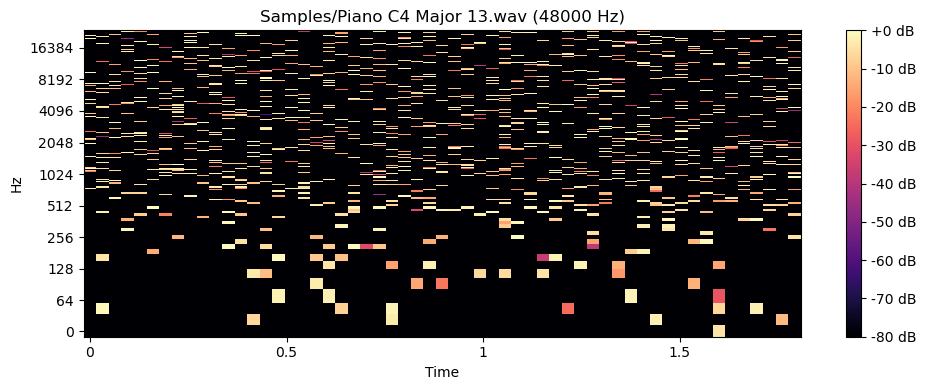

original = Torch.Tensor[1025, 57] x torch.complex64, size=58,425 elements = 467,400 bytes, device=cpu
input = Torch.Tensor[1024, 57] x torch.float32, size=58,368 elements = 233,472 bytes, device=mps:0
input: min=0.00000, max=1.00000
output = numpy.ndarray(1025, 57) x complex64, size=58,425 elements = 467,400 bytes
output: min=0.00000, max=278.00000+0.00000j


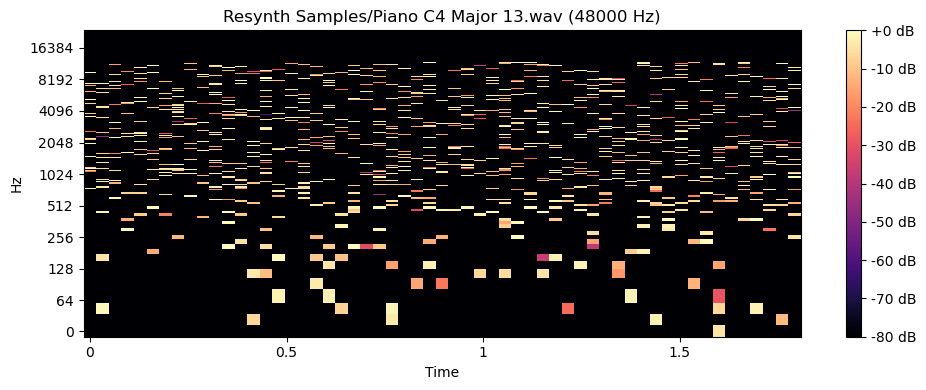

diff = numpy.ndarray(1025, 57) x float32, size=58,425 elements = 233,700 bytes


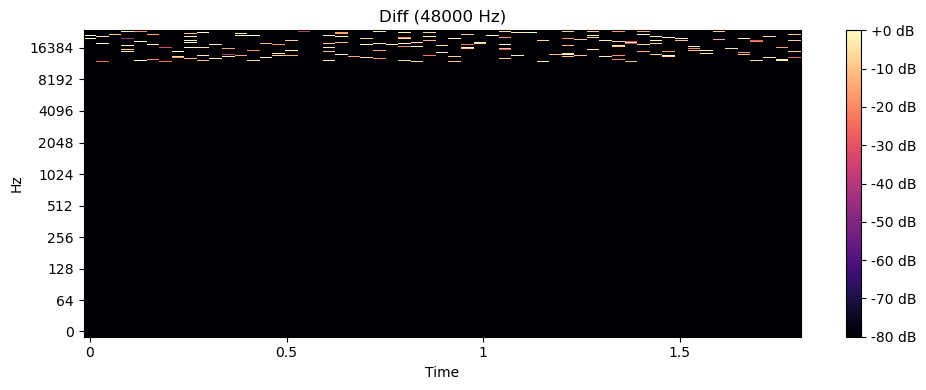

1 sample = 1,024 x 57 = 58,368


In [2]:
from HyperParameterTuning import *


# from MakeSTFTs import *
# from Train import *
# from AudioUtils import *

# Load a demo sample, convert to STFT and back and play the sound.
#demo_stft("Samples/Piano C4 Major 13.wav", 2048, 2048*3//4)

In [3]:
# Read all available samples and convert to STFTs
# This only needs to be done if the samples change or we change parameters such as the STFT size or the sample duration.

#make_STFTs()
#stop()

Loaded 1017 STFTs from STFTs.pkl
1017 STFTs
Using train=813 samples, test=204 samples.
MLP_VAE: stored params=[4, 5e-05, 48, 1, 0.5, 6, 3, 1.42]
optimiser: Adam batch=16, learning_rate=5e-05, weight_decay=0
MLP_VAE hidden=48, depth=1, ratio=0.5, latent=6, VAE depth=3, VAE ratio=1.42
VAE layers=[2736, 2162, 1200, 6]
MLP=1,198,176, VAE=17,050,336, approx total=18,248,512
StepWiseMLPAutoEncoder 1,198,176 parameters, compression=21.3
VariationalAutoEncoder: layers=[2736, 2162, 1200, 6], parameters=17,050,336, compression=456.0
CombinedVAE 18,248,512 parameters, compression=456.0
model=CombinedVAE(
  (auto_encoder): StepWiseMLPAutoEncoder(
    (encoder): Sequential(
      (0): Linear(in_features=2049, out_features=48, bias=True)
    )
    (decoder): Sequential(
      (0): Linear(in_features=1073, out_features=1024, bias=True)
    )
  )
  (vae): VariationalAutoEncoder(
    (encoder_layers): Sequential(
      (0): Linear(in_features=2736, out_features=2162, bias=True)
      (1): ReLU()
      

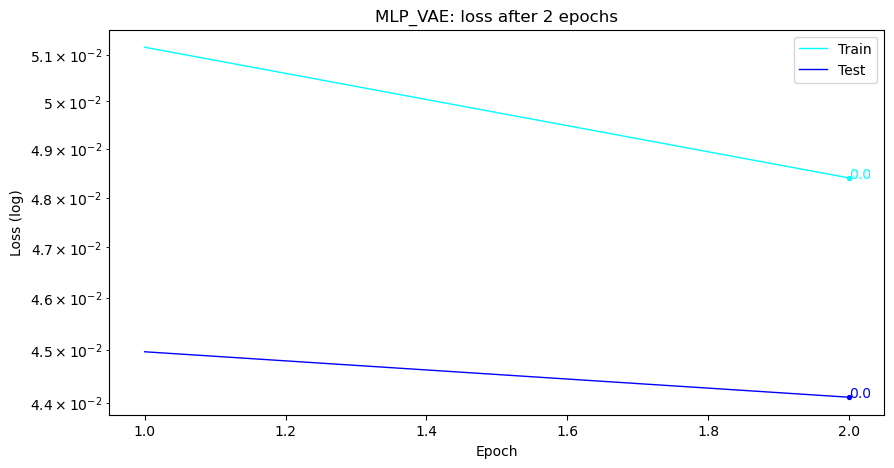

total=15 sec, epoch=3 (4.9 sec/epoch), train=0.05 (-1.11%), test=0.04 (-0.81%), overfit=0.91


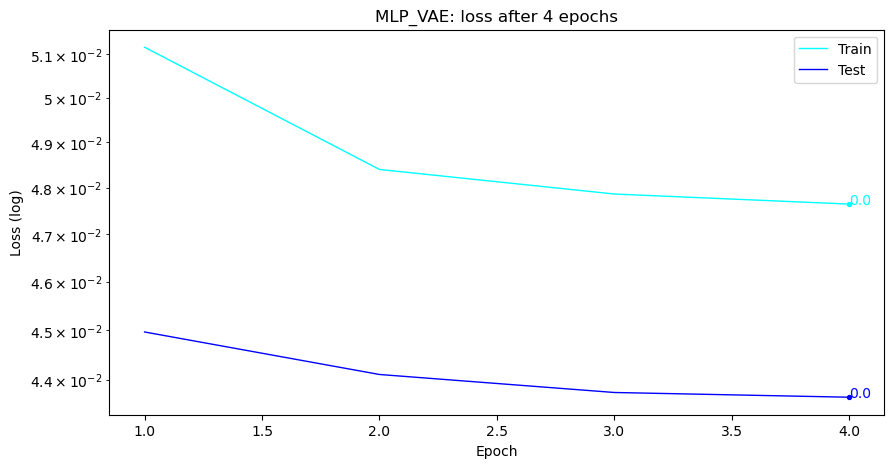

total=25 sec, epoch=5 (4.9 sec/epoch), train=0.05 (-0.27%), test=0.04 (-0.12%), overfit=0.92
*** Best! loss=0.05
MLP_VAE hidden=48, depth=1, ratio=0.5, latent=6, VAE depth=3, VAE ratio=1.42 (params=18,248,512, trainable=18,248,512 = 100.0%)
Adam batch=16, learning_rate=5e-05, weight_decay=0
hyper-parameters: [4, 5e-05, 48, 1, 0.5, 6, 3, 1.42]


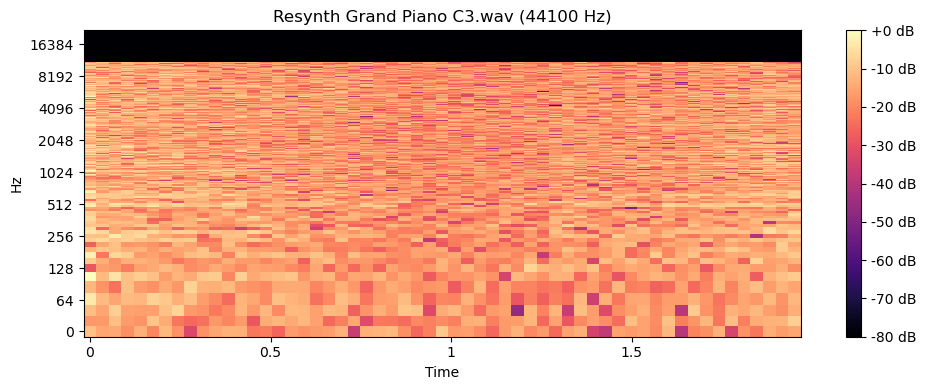

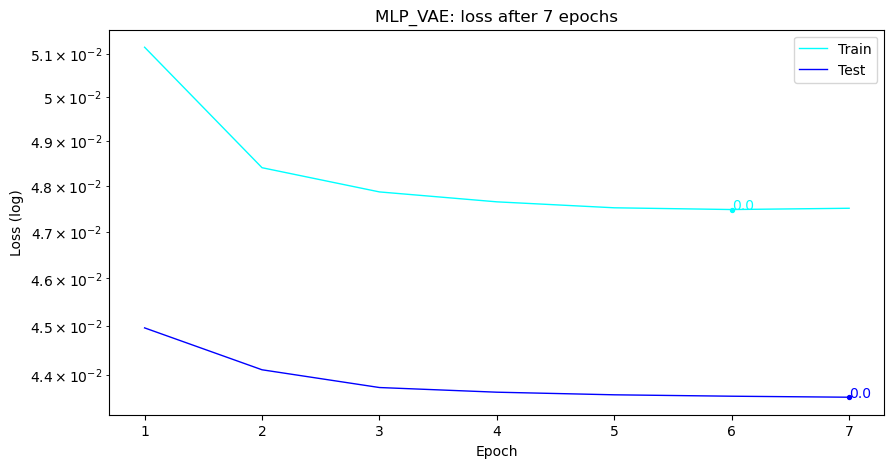

total=34 sec, epoch=7 (4.9 sec/epoch), train=0.05 (0.06%), test=0.04 (-0.05%), overfit=0.92
total=44 sec, epoch=9 (4.9 sec/epoch), train=0.05 (-0.09%), test=0.04 (-0.02%), overfit=0.92


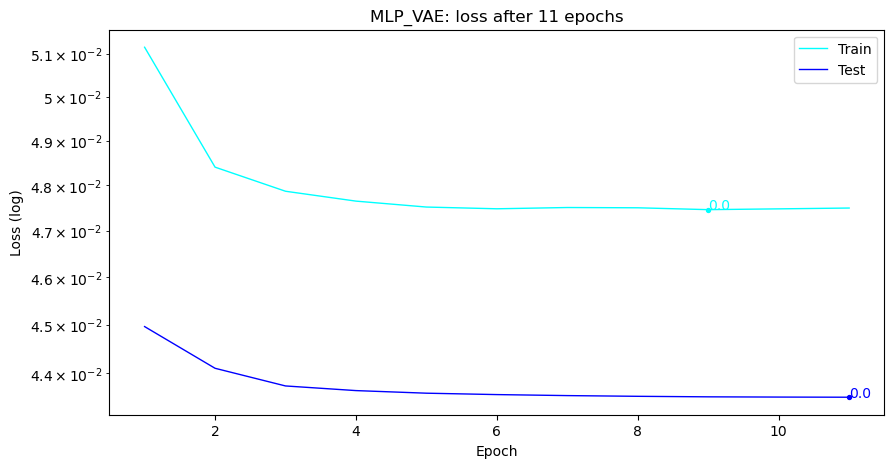

total=53 sec, epoch=11 (4.8 sec/epoch), train=0.05 (0.04%), test=0.04 (-0.01%), overfit=0.92
total=62 sec, epoch=13 (4.8 sec/epoch), train=0.05 (-0.16%), test=0.04 (-0.02%), overfit=0.92
total=71 sec, epoch=15 (4.8 sec/epoch), train=0.05 (-0.00%), test=0.04 (0.00%), overfit=0.92


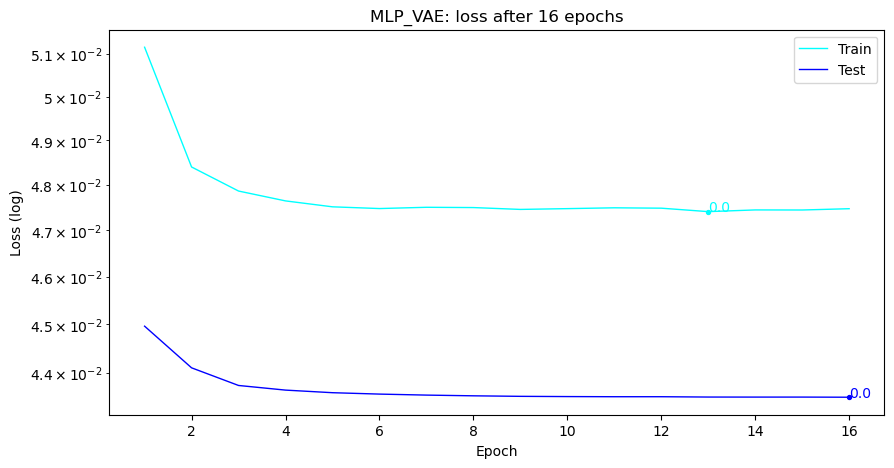

total=81 sec, epoch=17 (4.8 sec/epoch), train=0.05 (-0.08%), test=0.04 (0.00%), overfit=0.92
total=90 sec, epoch=19 (4.7 sec/epoch), train=0.05 (-0.06%), test=0.04 (0.00%), overfit=0.92


In [ ]:
# Find out the best hyper-parameters to train this model (typically needs to run overnight)
#model = "StepWiseMLP" # or "RNNAutoEncoder" and RNN_VAE_Incremental", or "StepWiseMLP" and "MLPVAE_Incremental"


#model = "RNNAutoEncoder"

model = "MLP_VAE"
#model = "StepWiseMLP"
#model = "MLPVAE_Incremental"

#model = "RNN_VAE"

#model = "STFT_VAE"

# First optimise the hyper-parameters for this model
#optimise_hyper_parameters(model)

# Then train using the best hyper-parameters
train_best_params(model)


# Alternatively, refine the training for the best set of hyper-parameters we've found


In [ ]:
# Test and Generate new samples
from Generate import *

use_model(model)

# Test the accuracy of the model: lists all samples by decreasing accuracy
test_all()

# Print some pretty pictures of the samples and their encodings
demo_all()



